In [15]:
import pandas as pd
import numpy as np
import skimage
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from skimage.io import imread, imsave

In [17]:
import os

In [4]:
data_folder = '../data'
images_folder = os.path.join(data_folder,'roof_images')
ids = pd.read_csv('../data/id_train.csv')

In [5]:
import helpers as H
reload(H)
H.images_folder = images_folder

In [6]:
from skimage.transform import rotate

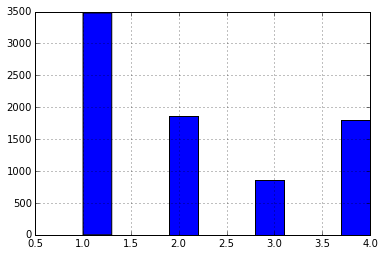

In [7]:
ids['label'].hist()

In [8]:
extension = '.bmp'
open_image_id = H.open_image_id

def resample_cls1(Id, resample_folder):
    img = open_image_id(Id)
    imsave(os.path.join(resample_folder,str(Id)+extension), img)
    return None
    
def resample_cls2(Id, resample_folder):
    img_name = str(Id)
    img = open_image_id(Id)
    imsave(os.path.join(resample_folder,img_name+extension), img)
    #flip
    rot_ang = 180
    img2 = rotate(img,rot_ang,resize=True)
    img2_name = img_name+'_'+str(rot_ang)
    imsave(os.path.join(resample_folder,img2_name+extension), img2)    
    return [img2_name]

def resample_cls4(Id, resample_folder):
    img_name = str(Id)
    img = open_image_id(Id)
    imsave(os.path.join(resample_folder,img_name+extension), img)
    #rotate 90, 180, 270
    r_int = np.random.randint(2)+1
    rot_ang = 90 * r_int
    img2 = rotate(img,rot_ang,resize=True)
    img2_name = img_name+'_'+str(rot_ang)
    imsave(os.path.join(resample_folder,img2_name+extension), img2)    
    return [img2_name]

def resample_cls3(Id, resample_folder):
    img_name = str(Id)
    img = open_image_id(Id)
    imsave(os.path.join(resample_folder,img_name+extension), img)
    #rotate 90, 180, 270
    img2_names = []
    angles = [90,180,270]
    for rot_ang in angles:
        img2 = rotate(img,rot_ang,resize=True)
        img2_name = img_name+'_'+str(rot_ang)
        imsave(os.path.join(resample_folder,img2_name+extension), img2)  
        img2_names.append(img2_name)
    return img2_names
    
sampler = {
    '1': resample_cls1,
    '2':resample_cls2,
    '3':resample_cls3,
    '4': resample_cls4,
}

In [9]:
def resample_all(data_folder, images_folder, df):
    resample_folder = os.path.join(data_folder,'resampled')
    if not os.path.exists(resample_folder):
        os.makedirs(resample_folder)
    new_samples = {'Id':[],'label':[]}
    for ind, (Id, label) in df.iterrows():
        new_sample_ids = sampler[str(label)](Id, resample_folder)
        if new_sample_ids!= None:
            new_samples['Id'] += new_sample_ids
            new_samples['label'] += len(new_sample_ids)*[label]
    return new_samples

In [10]:
new_samples = resample_all(data_folder,images_folder, ids)

/net/software/local/python/2.7.9/lib/python2.7/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [11]:
new_samples_df = ids.append(pd.DataFrame(new_samples), ignore_index=True)

In [12]:
new_samples_df[-10:]

,Id,label
14229,132244354_90,4
14230,132245662_180,2
14231,132245750_180,2
14232,132245760_180,2
14233,132245832_180,2
14234,132245951_90,4
14235,132245952_180,2
14236,132246203_180,2
14237,132246237_180,2
14238,132246252_180,2


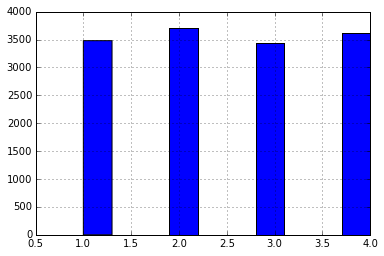

In [13]:
new_samples_df['label'].hist()

In [14]:
new_samples_df.to_csv(os.path.join(data_folder,'id_train_resampled.csv'),index=False)